# <font color = 'blue'>DEFINICIÓN DE OBJETIVOS JNCInfo</font>


En el siguiente notebook de jupyter encontrará algunas de las posibles funcionalidades para el aplicativo **JNCInfo**, junto con la "materia prima" necesaria para implementarlas. Los métodos que encontrará en este notebook son:

- [Estadística Descriptiva](#estadistica_descriptiva)
    * [Descripción de los pacientes de la JNCI](#obj_1)
    * [PCL  por Principales Patologías](#obj_2)
    * [Casos Atendidos por Sala](#obj_3)
    
    
- [Analisis de Regresión](#regresion)
    * [Predicción de PCL basado en variables independientes](#obj_4)
    * [Patrón de Concordancia para PCL Junta Regional vs. Junta Nacional](#obj_5)
    * [Análisis del Tiempo de Respuesta](#obj_6)
    
    
- [Series de Tiempo](#series_de_tiempo)
    * [Análisis de Series de Tiempo con Intervención](#obj_7)
    * [Predicción de Casos Futuros](#obj_8)


- [Árboles de Decisión](#arboles_de_decision)
    * [Predicción de Procesos Jucidiales Futuros](#obj_9)
    * [Análisis Predictivo de Origen](#obj_10)
    
    
- [Reglas de Asociación](#reglas_de_asociacion)
    * [Determinación de Asociaciones en el Conjunto de Datos](#obj_11)
    
    
- [Análisis de Datos Categóricos](#categoricos)
    * [Patrón de Concordancia para Determinación de Origen Junta Regional vs. Junta Nacional](#obj_12)
    
    
- [Análsis Espacial](#espacial)
    * [Análisis de Clusters de Patologías](#obj_13)
    
    
- [Redes Neurales](#redes_neurales)


**Nota:** Los modelos que se presentarán a continuación son **basados en simulaciones**. Los resultados obtenidos en este documento son realizados con fines ilustrativos. No se garantiza que el objetivo pueda ser llevado a cabo con el método propuesto.

<a id='estadistica_descriptiva'></a>
## <font color = 'orange'>Estadística Descriptiva</font>

Es el conjunto de métodos utilizados para resumir datos univariados y multivariados. Son el primer paso en la **gran** mayoría de estudios que requieren análisis de datos. Algunos de los métodos son:

1. Tabulación
2. Nubes de puntos
3. Medidas resumen de una distribución (media, varianza, sesgo, kurtosis, cuantiles, etc.)
4. histogramas

![title](scatterplot.png)

A continuación enunciamos algunos de los posibles usos de estos métodos.

<a id = 'obj_1'></a>
### 1. Descripción de los Pacientes de la JNCI
<font color = 'green'> ¿Qué tipo de pacientes se hacen presente en la JNCI? </font>

Con el fin de describir los individuos que se hacen presentes en la **JNC** es necesaria la siguiente información **individualizada por cada paciente**:

**Información Necesaria**
1. Fecha de nacimiento
2. Género
3. Oficio del Paciente (Estandarizar por código de oficios) (censo o sena)
4. Patología por la cual comparece en junta (Código CIE10)
5. Sala que califica
6. Miembros de junta que atienden el recurso
7. Junta regional que remite

**Información Opcional**
1. Lugar de Nacimiento
2. Estatura
3. Peso
4. Fecha de envío o radicación en junta nacional
5. Fecha de reparto
6. Fecha de valoración
7. Fecha de emisión del dictamen
8. Fecha en que se informa la decisión al paciente
9. Trazadores que se consideren de interés


En caso de que un individuo tenga más de una patología, se debe relacionar el registro con cada patología en la base de datos. A continuación veremos algunos ejemplos.

**Ejemplo 1:** A continuación se muestran algunos datos simulados. Realicemos un pequeño análisis exploratorio para generar ciertas hipótesis.

In [1]:
import pandas as pd
import numpy as np

Datos1 = pd.read_csv('DF1.csv')
display(Datos1)

,id,edad,patologia,sala,IMC,tiempo
0,1,10.526580,F73,2,20.681103,0.050680
1,2,11.229136,F73,2,21.471617,0.065025
2,3,0.575019,F73,1,21.603537,0.112816
3,4,6.003600,F73,2,21.780315,0.141831
4,5,2.949274,F73,1,22.413249,0.060306
5,6,1.881753,F73,2,21.768704,0.027591
6,7,1.727122,F73,1,22.645916,0.006033
7,8,5.653523,F73,3,20.589108,0.026695
8,9,4.269020,F73,3,22.539483,0.192446
9,10,34.077797,E10,2,25.857876,0.013249


Veamos si es posible identificar algún patron en este conjunto de datos.

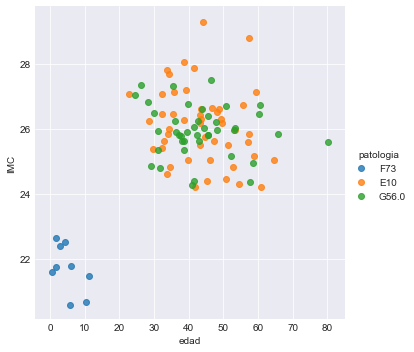

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
sns.lmplot(x = 'edad', y = 'IMC', hue = 'patologia',
            fit_reg = False, data = Datos1)
plt.show()

Con ayuda del gráfico anterior podemos ver que hay dos **clusters** de pacienter. Por un lado, tenemos un pequeño cluster con individuos menores de **15 años** y la patología que padecen es retraso mental (muy posiblemente casos de sustitución pensional). Por otro lado, vemos que hay un cluster mas grande de personas entre 20 y 80 años que sufren al parecer en igual medida de **diabetes** y **tunel del carpo**.

**Es posible** que ciertas organizaciones aleguen que el tiempo de respuesta a los recursos es demasiado largo y que la sala **X** se está tomando demasiado tiempo en responder. Para resolver tales inquietudes es posible ilustrar el lapso entre radicación y respuesta por medio de un **histograma**. 

El tiempo de atención promedio es: 0.15 meses


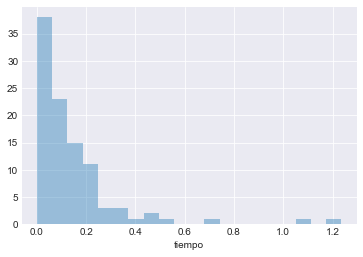

In [3]:
sns.distplot(Datos1["tiempo"], kde = False)
print("El tiempo de atención promedio es: " + 
      str(np.round(np.mean(Datos1["tiempo"]), 2)) + 
      " meses")
plt.show()

Vemos que la gran mayoría de casos toma menos de 18 días. Sin embargo, vemos que hay una pequeña cantidad de casos que toman mas tiempo en responder. Para examinar si la demora es causada por la sala que atiende al paciente, o bien, la patología en cuestión recurrimos a un análisis factorial gráfico.

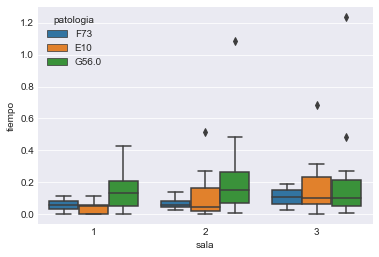

In [4]:
categoriaSala = Datos1['sala'].astype('category')
sns.boxplot(x = categoriaSala, 
               y =  Datos1['tiempo'], 
               hue = Datos1['patologia'])
plt.show()

Efectivamente, parece que hay ciertos casos de **tunel del carpo** y **diabetes** que son considerablemente más demorados. Para generar conocimiento, es necesario verificar la razón por la cual dichos casos tomaron más tiempo.

<a id = 'obj_2'></a>
### 2. PCL  por Principales Patologías
<font color = 'green'> ¿Cómo se comporta la variable **PCL** en las principales patologías?</font>

Con el fin de describir el comportamiento de la variable **PCL** es necesaria la siguiente información **individualizada por paciente**:

**Información Necesaria**
1. PCL otorgado por junta regional
2. PCL otorgado por junta nacional
3. Patología
4. Oficio del paciente
5. Género
6. Junta que remite
7. Sala que recibe el recurso
8. Fecha de nacimiento

**Información Opcional**
1. Miembros de junta que atienden el caso
2. Edad
3. Peso
4. Talla
5. Trazadores que se consideren de interés

<a id = 'obj_3'></a>
### 3. Casos Atendidos por Sala
<font color = 'green'>¿Existe algún sesgo en alguna de las salas de la JNCI?</font>

Con el fin de describir el tipo de casos que se atienden por sala; ver si la distribución de los casos es aleatoria y demostrar la insesgabilidad del proceso. La información necesaria (**individualizada por paciente**) es:

**Información Necesaria:**
1. Sala que recibe el recurso
2. Patología
3. Genero del paciente
4. Oficio del Paciente
5. Junta que remite

**Información Opcional:**
1. Miembros que atienden

<a id='regresion'></a>
## <font color = 'orange'>Análisis de Regresión</font>

Es una herramienta analítica y predictiva que permite estimar la relación entre las variables al interior de un conjunto de datos. Por medio del análisis de regresion se puede determinar que variables "aportan" significativamente al modelo y el efecto de las mismas. Entre los métodos más conocidos se encuentran:

1. Regresión por mínimos cuadrados ordinarios
2. Regresión Ridge y Lasso
3. Regresión no paramétrica
4. Análisis de varianza
5. Regresión no lineal

![title](regression.png)

Algunos de los posibles usos para estos métodos son:

<a id = 'obj_4'></a>
### 4. Predicción de PCL basado en variables independientes
<font color = 'green'>¿Qué influencia tienen las variables exógenas en el puntaje PCL?</font>

Utilizando métodos de regresión es posible modelar el puntaje PCL a partir de otras variables y determinar si estas son significativas en la determinación del puntaje PCL final.

**Información Necesaria** (**individualizada por paciente**)
1. PCL otorgado por junta regional
2. PCL otorgado por junta nacional
3. Patología
4. Profesión del paciente
5. Género
6. Junta que remite
7. Sala que recibe el recurso
8. Fecha de nacimiento

**Información Opcional** (**individualizada por paciente**)
1. Miembros de junta que atienden el caso
2. Edad
3. Peso
4. Talla
5. Trazadores que se consideren de interés

**Ejemplo 2:** Para ilustrar el objetivo, veamos un análisis de regresión en un **conjunto reducido** de datos (<font color = 'red'> Supóngase que solo hay una junta que remite </font>).:

In [5]:
Datos2 = pd.read_csv('DF2.csv')

display(Datos2)

,id,edad,patologia,PCLInicial,PCLFinal
0,1,9.328781,F73,0.415477,0.421278
1,2,6.645088,F73,0.591766,0.598006
2,3,8.784091,F73,0.497672,0.504565
3,4,3.386884,F73,0.553781,0.566332
4,5,2.981180,F73,0.494975,0.495289
5,6,0.491736,F73,0.484466,0.488792
6,7,8.103582,F73,0.555502,0.569327
7,8,3.281860,F73,0.490428,0.505764
8,9,4.802932,F73,0.505466,0.521736
9,10,44.720718,E10,0.367761,0.474151


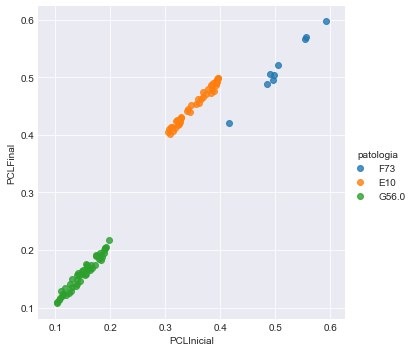

In [6]:
sns.set_style('darkgrid')
sns.lmplot(x = 'PCLInicial', y = 'PCLFinal', hue = 'patologia',
            fit_reg = False, data = Datos2)
plt.show()

El gráfico anterior, nos muestra que el PCL inicial es una variable predictora importante. Además, parece que la junta regional remitente está otorgando un PCL más bajo del que debería ser en las diabetes (**E10**).

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('PCLFinal ~ PCLInicial + edad + patologia', data = Datos2).fit()
print(mod.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:               PCLFinal   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.106e+04
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          4.41e-139
Time:                        00:08:55   Log-Likelihood:                 382.80
No. Observations:                 100   AIC:                            -755.6
Df Residuals:                      95   BIC:                            -742.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0914      0

Vemos que efectivamente, hay una discrepancia de alrededor de ocho puntos porcentuales con respecto a la junta regional para los pacientes con diabetes. Que la variable **edad**, si bien es significativa, su efecto es demasiado pequeño como para influir en el modelo. Mas aún, la edad no tiene un efecto considerable en el modelo por lo que se puede eliminar. Además, vemos que el número de condición es muy grande, indicando que el modelo tiene un problema de multicolinealidad. Sería necesario aplicar un método de regularización.

<a id = 'obj_5'></a>
### 5. Patrón de Concordancia para PCL Junta Regional vs. Junta Nacional
<font color = 'green'>¿Existen discrepancias con las juntas regionales en cuanto al puntaje PCL que otorgan?</font>

Con el fin de estandarizar los procesos de calificación. Proponemos incorporar un modelo de control de calidad, el cual identifique las juntas que sistemáticamente otorguen un PCL más bajo (o más alto) a ciertas patologías. **Individualizando por paciente** la información necesaria es:

**Información Necesaria**

1. PCL otorgado por Junta regional que acoje el recurso
2. PCL otorgado por JNCI
3. Patología
4. Junta Regional que acoje al paciente
5. Oficio desempeñado por el paciente

**Información Opcional**

1. Edad del paciente
2. Peso
3. Talla
4. Género
5. Trazadores que se consideren de interés

<a id = 'obj_6'></a>
### 6. Análisis del Tiempo de Respuesta
<font color = 'green'>¿Cuánto tiempo deben esperar los pacientes: desde que inician los recursos, hasta que son informados de la decisión? </font>

Con el fin de evaluar los procesos de atención, proponemos ajustar un modelo de regresión para determinar cuales factores son determinantes en el tiempo de atención al cliente.

**Información Necesaria (individualizada por paciente)**
1. Fecha de nacimiento
2. Fecha de envío o radicación en junta nacional
3. Fecha de reparto
4. Fecha de valoración
5. Fecha de audiencia y presentación de dictamen
8. Fecha en que se informa la decisión al paciente (notificación)
9. Patología por la cual comparece en junta (Código CIE10)
10. Sala que califica
11. Miembros de junta que atienden el recurso
12. Junta regional que remite
13. Tipo de recurso (PCL, Origen, Fecha de estructuración)

**Información Opcional (individualizada por paciente)**
1. Oficio del Paciente
2. Trazadores que se consideren de interés



<a id='series_de_tiempo'></a>
## <font color = 'orange'>Series de Tiempo</font>

Es un conjunto de modelos de regresión muy importante, son utilizados comunmente para predecir y analizar ciertas variables a través del tiempo. Los modelos de series de tiempo son muy usados por economistas para la predicción de variables como inflación, incremento en el PIB, ingresos, entre otros. Los modelos más comunes son:

1. **ARIMA**
2. SARIMA
3. ARIMAX
4. ARIMA con intervención

![title](time_series.png)

<a id = 'obj_7'></a>
### 7. Análisis de Series de Tiempo con Intervención

<font color="green">¿Cuál ha sido el impacto en el comportamiento del **PCL** promedio con el cambio de manual de calificación? </font>

Proponemos evaluar la existencia de impactos en el comportamiento de un indicador al realizarse una intervención en algún tiempo arbitrario.   

**Información Necesaria**

1. Fecha (mes y año)
2. PCL promedio calificado en el mes

**Ejemplo 3:**

![Simulación](rd.png)

La intervención se denota con la linea vertical. Luego de esta se puede apreciar que hubo un cambio en la tendencia de la serie de tiempo. Las lineas punteadas representan la expectativa de la tendencia sin la intervención, mientras que las lineas continuas reflejan la tendencia observada en cada periodo. En esta simulación el cambio de manual redujo la cantidad de dictamentes de origen laboral en los hombres mientras que en las mujeres se aumento. Se pueden realizar pruebas de significancia del cambio en producto de la intervención.

Los datos necesarios para ejecutar este analisis deben tener la siguiente estructura:

In [8]:
dat7=[["2016-1",1600,1],["2016-2",1789,1],["2016-3",1654,1],["2016-4",1318,2],["2016-5",1418,2],["2016-6",1518,2]]
pd.DataFrame(dat7,columns=["Mes","Variable de Interes","Manual"])

,Mes,Variable de Interes,Manual
0,2016-1,1600,1
1,2016-2,1789,1
2,2016-3,1654,1
3,2016-4,1318,2
4,2016-5,1418,2
5,2016-6,1518,2


<a id = 'obj_8'></a>
### 8. Predicción de Casos Futuros
<font color = 'green'>¿En el futuro, cuántos casos podemos esperar mensualmente?</font>

Con el fin de facilitar los procesos administrativos y de planeación, proponemos incorporar una funcionalidad para predecir la cantidad de casos futuros de la **JNCI**.

**Información Necesaria**
1. Fecha (Mes y año)
2. Cantidad de casos atendidos en el mes

<a id='arboles_de_decision'></a>
## <font color ='orange'>Árboles de Decisión</font>

Es un algoritmo que utiliza un diagrama de árbol para ir de los atributos de una observación a conclusiones acerca del valor de alguna variable objetivo. Si la variable objetivo es categórica, entonces el álgoritmo recibe el nombre de árbol de clasificación, si la variable objetivo es continua, el algoritmo recibe el nombre de árbol de regresión. Los métodos más comunes son:

1. IDE3
2. C4.5
3. Random Forest
4. XGBoost

![classification tree](classification_tree.png)

<a id = 'obj_9'></a>
### 9. Predicción de Procesos Jucidiales Futuros
<font color="green"> ¿Dados ciertos atributos del paciente, cuál es la probabilidad de que cada dictamen resulte en una demanda? </font>

Teniendo en cuenta los proceso de demandas frente a los dictamendes emitidos por la Junta Nacional en el pasado, se pueden encontrar patrones en las situaciones que dan origen a estas para establecer una probabilidad a priori de demanda de un dictamen nuevo.
 
La información requerida para poder llevar a cabo este objetivo, adicionalmente a la contenida en los objetivos anteriores es, para cada dictamen:

**Información Necesaria (individualizada por paciente)**
1. Junta que remite
2. Tipo de controversia (PCL, origen, Fecha de estructuración)
3. Resultado de la controversia en junta regional (puntaje, laboral/común, ...)
4. Resultado de la controversia en junta nacional
5. El paciente demanda? (si/no)
6. Oficio del paciente
7. Edad del paciente
8. Genero del paciente

**Información Opcional (individualizada por paciente)**
9. Peso
10. Talla
11. Trazadores que se consideren de interés

<a id = 'obj_10'></a>
### 10. Análisis Predictivo de Origen
<font color = 'green'>¿Es posible automatizar la determinación de origen?</font>

**Con fines académicos**, proponemos determinar reglas en los procesos de determinación de origen en la Junta Nacional.

**Información Necesaria (individualizada por paciente)**
1. PCL otorgado por junta regional
2. PCL otorgado por junta nacional
3. Patología
4. Profesión del paciente
5. Género
6. Junta que remite
7. Sala que recibe el recurso
8. Fecha de nacimiento
9. Antigüedad del oficio

**Información Opcional (individualizada por paciente)**
1. Miembros de junta que atienden el caso
2. Edad
3. Peso
4. Talla
5. Trazadores que se consideren de interés


<a id='reglas_de_asociacion'></a>
## <font color = 'orange'>Reglas de Asociación</font>

Es un modelo sencillo, eficaz y computacionalmente costoso utilizado para descubrir hechos que ocurren en común al interior de un conjunto de datos.

![association rules](association_rules.png)

<a id = 'obj_11'></a>
### 11. Determinación de Asociaciones en el Conjunto de Datos
<font color = 'green'>¿Qué combinaciones de atributos son más probables de obtener?</font>

Una práctica común en machine learning es encontrar las asociaciones más fuertes entre los atributos categóricos de un conjunto de datos:

**Información Necesaria (individualizada por paciente)**
1. Patologia
2. Oficio
3. Tipo de controversia
4. Junta regional que remita

**Información Opcional (Individualizada por paciente)**
1. Demás Trazadores que se consideren de interés

<a id = 'categoricos'></a>
## <font color = 'orange'>Análisis de Datos Categóricos</font>

Es el conjunto de métodos utilizados para modelar fenómenos cuya variable respuesta es cualitativa. El conjunto de modelos incluye:

1. Análisis de tablas de contingencia
2. Regresión Logit
3. Regresión Poisson
4. Regresión Multinomial

![title](logit.png)

<a id = 'obj_12'></a>

### 12. Patrón de Concordancia para Determinación de Origen Junta Regional vs. Junta Nacional
<font color = 'green'>¿Existen discrepancias con las juntas regionales en cuanto a la determinación de origen?</font>

Con el fin de estandarizar los procesos de calificación. Proponemos incorporar un modelo de control de calidad, el cual identifique las juntas que sistemáticamente determinen un origen distinto al de la JNC.

**Información Necesaria (individualizada por paciente)**

1. Origen dictaminado por junta regional
2. Origen dictaminado por junta nacional
3. Patología
4. Junta regional que remite
5. Oficio desempeñado por el paciente

**Información Opcional (individualizada por paciente)**

1. Edad del paciente
2. Peso
3. Estatura
4. Género
5. Trazadores que se consideren de interés



<a id = 'espacial'></a>
## <font color = 'orange'>Análisis Espacial</font>

Conjunto de herramientas analíticas y predictivas para el análisis de datos que se encuentran correlacionados espacialmente. Entre los métodos más famosos se encuentran:

1. Kriging
2. Análisis de procesos puntuales
3. Análisis de datos espaciales en retículos

![Bike](bike_ggplot.png)

<a id = 'obj_13'></a>
### 13. Modelos de Regresión Espacial
<font color="green"> ¿Existe algun departamento de colombia en la cual se presenta con mayor frecuencia una enfermedad laboral?</font>     
<font color="green"> ¿Qué departamentos estan correlacionados en cuanto a los padecimientos que aquejan a sus trabajadores?</font>     
<font color="green"> ¿Qué variables estan aumentando la presencia de una enfermedad en los departamentos de Colombia?</font> 

Con la información agregada por áreas como municipios o departamentos puede realizarse un analisis con el fin de encontrar la distribución y correlación geografica de eventos epidemiologicos y administrativos.

El conjunto de datos necesario para llevar a cabo este analisis es, por ejemplo, para alguna franja de tiempo:

**Información Necesaria (individualizada por paciente)**
1. Junta que remite
2. Tipo de controversia
3. Patología
4. Oficio del paciente
5. Género

**Información Opcional (individualizada por paciente)**
1. Peso
2. Talla
3. Trazadores que se consideren de interés

![mapa](mapa_areas.png)

<a id = 'redes_neurales'></a>
## <font color = 'orange'>Redes Neurales</font>

Es un conjunto de herramientas predictivas (mas no analíticas) bastante utilizadas el día de hoy para reconocimiento facial, reconocimiento de voz y detección de fraudes. Son un excelente "plan B" para cuando los modelos inicialmente propuestos no funcionan gracias a la facilidad que tienen de expresar funciones no lineales. Algunas de las arquitecturas más famosas son:

1. Feedforward neural networks
2. CNN
3. RNN

![Red_Neural](NeuralNetwork.png)